# Data Analysis and Preparation for ETL and Dashboard

## Introduction
This notebook is designed to analyze and prepare data from two sources: a CSV file (`orders.csv`) and three tables from a MySQL database. The objective is to perform data cleaning, validation, and exploratory data analysis (EDA) to ensure the data is ready for an ETL process and subsequent dashboard creation.

## Objectives
1. Load data from the CSV file and MySQL database.
2. Perform data cleaning and handle missing or incorrect data.
3. Validate relationships between the CSV data and database tables.
4. Conduct exploratory data analysis to understand the data better.
5. Conclusion.

## Data Sources
- **CSV File**: `orders.csv`
- **MySQL Database Tables**:
  - `category`
  - `seller`
  - `product`


### Libraries and Setup

In [52]:
# Install necessary libraries
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 108.4/108.4 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ---------------------------------------- 133.3/133.3 kB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 83.9/83.9 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/163.0 kB ? eta -:--:--
   ------------------------------------- -- 153.6/163.0 kB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 163.0/163.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   -------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\matti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import seaborn as sns

In [9]:
# Import .env for MySQL credentials
load_dotenv('.env')

# Configure database connection
db_config = {
    'user': os.getenv('MYSQL_USER'),
    'password': os.getenv('MYSQL_PASSWORD'),
    'host': os.getenv('MYSQL_HOST'),
    'database': os.getenv('MYSQL_DATABASE')
}

# Configure CSV file path
orders_file_path = './orders.csv'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}')

### Loading Data from CSV and Database

In [10]:
# Load orders data from CSV
orders = pd.read_csv('orders.csv')

# Load data from MySQL database tables
categories = pd.read_sql('SELECT * FROM category', engine)
sellers = pd.read_sql('SELECT * FROM seller', engine)
products = pd.read_sql('SELECT * FROM product', engine)

In [11]:
# Display the first few rows of each DataFrame
print("Orders Data:")
print(orders.head())

print("Categories Data:")
print(categories.head())

print("Sellers Data:")
print(sellers.head())

print("Products Data:")
print(products.head())

Orders Data:
   order_id  client_id  product_id  city_name   city_x  city_y        date
0         1        101           1      Paris  48.8566  2.3522  2024-04-25
1         2        102           3       Lyon  45.7640  4.8357  2024-02-07
2         3        103           2  Marseille  43.2965  5.3698  2024-01-30
3         4        104           1   Toulouse  43.6047  1.4442  2024-07-12
4         5        105           4       Nice  43.7102  7.2620  2024-07-01
Categories Data:
   category_id category_name         category_description
0            1   Electronics          Devices and gadgets
1            2         Books       Various types of books
2            3      Clothing      Apparel and accessories
3            4     Furniture    Home and office furniture
4            5          Toys  Toys and games for children
Sellers Data:
   seller_id     seller_name                     seller_description
0          1       TechWorld         Electronics and gadgets seller
1          2        Bo

### Data Cleaning and Validation

#### Initial Data Inspection

In [15]:
# Initial data inspection for orders
print("Orders Data:")
print(orders.info())
print(orders.head())


Orders Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    61 non-null     int64  
 1   client_id   61 non-null     int64  
 2   product_id  61 non-null     int64  
 3   city_name   61 non-null     object 
 4   city_x      61 non-null     float64
 5   city_y      61 non-null     float64
 6   date        61 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 3.5+ KB
None
   order_id  client_id  product_id  city_name   city_x  city_y        date
0         1        101           1      Paris  48.8566  2.3522  2024-04-25
1         2        102           3       Lyon  45.7640  4.8357  2024-02-07
2         3        103           2  Marseille  43.2965  5.3698  2024-01-30
3         4        104           1   Toulouse  43.6047  1.4442  2024-07-12
4         5        105           4       Nice  43.7102  7.2620  2024-07-01

In [16]:
# Check all the different cities in the orders
unique_cities = orders['city_name'].unique()
print("Different cities in the orders:")
print(unique_cities)

Different cities in the orders:
['Paris' 'Lyon' 'Marseille' 'Toulouse' 'Nice' 'Nantes' 'Strasbourg'
 'Montpellier' 'Bordeaux' 'Lille' 'Idk']


The orders DataFrame contains 61 entries with complete data across 7 columns, including order details, city information, and dates. All columns have the appropriate data types with no missing values. The orders DataFrame contains 61 entries with complete data across 7 columns, including order details, city information, and dates. All columns have the appropriate data types with no missing values. The different cities in the orders include 10 known cities and 1 unknown entry labeled as 'Idk', indicating a need to handle this unknown city during data cleaning.

In [17]:
# Initial data inspection for categories
print("Categories Data:")
print(categories.info())
print(categories.head())

Categories Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category_id           13 non-null     int64 
 1   category_name         13 non-null     object
 2   category_description  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 444.0+ bytes
None
   category_id category_name         category_description
0            1   Electronics          Devices and gadgets
1            2         Books       Various types of books
2            3      Clothing      Apparel and accessories
3            4     Furniture    Home and office furniture
4            5          Toys  Toys and games for children


The categories DataFrame contains 13 entries with complete data across 3 columns, including category ID, name, and description. All columns have the appropriate data types with no missing values. This indicates that the category data is comprehensive and well-structured, providing a clear categorization for products in the dataset.

In [18]:
# Initial data inspection for sellers
print("Sellers Data:")
print(sellers.info())
print(sellers.head())

Sellers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seller_id           8 non-null      int64 
 1   seller_name         8 non-null      object
 2   seller_description  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes
None
   seller_id     seller_name                     seller_description
0          1       TechWorld         Electronics and gadgets seller
1          2        BookBarn                            Book seller
2          3      FashionHub        Clothing and accessories seller
3          4  HomeEssentials  Furniture and home accessories seller
4          5         ToyLand                  Toys and games seller


The sellers DataFrame contains 8 entries with complete data across 3 columns, including seller ID, name, and description. All columns have the appropriate data types with no missing values. This indicates that the seller data is well-organized and complete, providing clear information about each seller.

In [19]:
# Initial data inspection for products
print("Products Data:")
print(products.info())
print(products.head())

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     26 non-null     int64  
 1   category_id    26 non-null     int64  
 2   seller_id      26 non-null     int64  
 3   product_name   26 non-null     object 
 4   product_price  26 non-null     float64
 5   description    26 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ KB
None
   product_id  category_id  seller_id      product_name  product_price  \
0           1            1          1        Smartphone         699.99   
1           2            1          1            Laptop        1299.99   
2           3            2          2      Fiction Book          19.99   
3           4            2          2  Non-fiction Book          29.99   
4           5            3          3           T-shirt          14.99   

                   

The products DataFrame contains 26 entries with complete data across 6 columns, including product ID, category ID, seller ID, product name, price, and description. All columns have the appropriate data types with no missing values. This indicates that the product data is well-structured and comprehensive, providing detailed information about each product.

### Data Cleaning and Validation

In [21]:
# Replace 'Idk' with NaN in the city_name column of orders
orders = orders.replace({'city_name': {'Idk': np.nan}})

In [22]:
# Check for missing values in each DataFrame
print("Missing values in Orders:")
print(orders.isnull().sum())

print("Missing values in Categories:")
print(categories.isnull().sum())

print("Missing values in Sellers:")
print(sellers.isnull().sum())

print("Missing values in Products:")
print(products.isnull().sum())

Missing values in Orders:
order_id      0
client_id     0
product_id    0
city_name     3
city_x        0
city_y        0
date          0
dtype: int64
Missing values in Categories:
category_id             0
category_name           0
category_description    0
dtype: int64
Missing values in Sellers:
seller_id             0
seller_name           0
seller_description    0
dtype: int64
Missing values in Products:
product_id       0
category_id      0
seller_id        0
product_name     0
product_price    0
description      0
dtype: int64


The orders DataFrame has 3 missing values in the city_name column. This issue needs to be addressed to ensure the accuracy of location-based analysis.

In [23]:
# Validate relationships between orders and products
invalid_product_ids = orders[~orders['product_id'].isin(products['product_id'])]
print("Orders with invalid product IDs:")
print(invalid_product_ids)

Orders with invalid product IDs:
Empty DataFrame
Columns: [order_id, client_id, product_id, city_name, city_x, city_y, date]
Index: []


The validation shows that there are no orders with invalid product IDs. This means that every product_id in the orders DataFrame exists in the products DataFrame. Therefore, the relationship between orders and products is intact, and there are no mismatches or missing references.

In the following code, I iteratively fill missing city_name values in the orders DataFrame using coordinates (city_x and city_y) from other rows where these coordinates are available and city_name is not null. The final output confirms that there are no longer any missing values in the city_name column of the orders DataFrame.

In [66]:
# Find rows with missing city_name
missing_city_rows = orders['city_name'].isnull()

# Iterate over each row with missing city_name
for index, row in orders[missing_city_rows].iterrows():
    # Find rows with matching coordinates
    match = orders[(orders['city_x'] == row['city_x']) & (orders['city_y'] == row['city_y']) & (~orders['city_name'].isnull())]
    
    # If a match is found, replace missing city_name with matched city_name
    if not match.empty:
        orders.at[index, 'city_name'] = match.iloc[0]['city_name']

# Check for missing values in the new orders to verify
print("Missing values in Orders:")
print(orders.isnull().sum())

Missing values in Orders:
order_id      0
client_id     0
product_id    0
city_name     0
city_x        0
city_y        0
date          0
dtype: int64


The output shows that after iteratively replacing missing city_name values with corresponding matches based on coordinates, all entries in the city_name column are now filled. This ensures data completeness and prepares the orders DataFrame for further analysis or visualization tasks without any missing geographical information.

### Exploratory Data Analysis (EDA)

In [56]:
# Merge data for analysis
merged_data = orders.merge(products, on='product_id', how='left') \
                    .merge(categories, on='category_id', how='left') \
                    .merge(sellers, on='seller_id', how='left')

In [32]:
# Display the first few rows of the merged data
print("Merged Data:")
print(merged_data.head())


Merged Data:
   order_id  client_id  product_id  city_name   city_x  city_y        date  \
0         1        101           1      Paris  48.8566  2.3522  2024-04-25   
1         2        102           3       Lyon  45.7640  4.8357  2024-02-07   
2         3        103           2  Marseille  43.2965  5.3698  2024-01-30   
3         4        104           1   Toulouse  43.6047  1.4442  2024-07-12   
4         5        105           4       Nice  43.7102  7.2620  2024-07-01   

   category_id  seller_id      product_name  product_price  \
0            1          1        Smartphone         699.99   
1            2          2      Fiction Book          19.99   
2            1          1            Laptop        1299.99   
3            1          1        Smartphone         699.99   
4            2          2  Non-fiction Book          29.99   

                                 description category_name  \
0    Latest model smartphone with 5G support   Electronics   
1                    

The "Merged Data" table combines information from the orders, products, categories, and sellers data frames into a single view. Each row represents an order with detailed information including the city name, coordinates, product details, category information, seller details, and additional descriptions.

In [33]:
# Basic statistics
print("Basic Statistics of Merged Data:")
print(merged_data.describe())

Basic Statistics of Merged Data:
        order_id   client_id  product_id     city_x     city_y  category_id  \
count  61.000000   61.000000   61.000000  61.000000  61.000000    61.000000   
mean   31.000000  131.000000   11.704918  46.271259   3.986154     6.098361   
std    17.752934   17.752934    8.181981   2.727386   2.267085     4.081278   
min     1.000000  101.000000    1.000000  43.296500  -1.553600     1.000000   
25%    16.000000  116.000000    4.000000  43.610800   2.352200     2.000000   
50%    31.000000  131.000000   11.000000  45.764000   4.835700     6.000000   
75%    46.000000  146.000000   19.000000  48.856600   5.369800    10.000000   
max    61.000000  161.000000   26.000000  50.629200   7.752100    13.000000   

       seller_id  product_price  
count  61.000000      61.000000  
mean    3.475410     247.481803  
std     2.203078     381.152796  
min     1.000000       2.990000  
25%     2.000000      19.990000  
50%     3.000000      39.990000  
75%     5.000000 

The basic statistics show that:

    Orders: The dataset includes 61 orders with IDs ranging from 1 to 61. Orders span various cities, with coordinates indicating a geographical range across different parts of the country.

    Products: The average product price across orders is approximately $247, with a wide range from $2.99 to $1299.99, indicating diverse pricing among products sold.

    Categories and Sellers: There are 13 unique categories and 8 sellers involved in the orders, suggesting a diverse range of product types and sources.

These statistics provide a snapshot of the dataset's composition, showcasing the distribution of orders, product pricing dynamics, and the diversity among categories and sellers involved in the transactions.

#### Geographical Insights

In [30]:
# Number of orders per city
city_order_counts = merged_data['city_name'].value_counts()
print("Number of Orders per City:")
print(city_order_counts)

Number of Orders per City:
city_name
Marseille      12
Paris          11
Lyon           11
Lille           9
Nice            7
Bordeaux        3
Nantes          2
Toulouse        2
Montpellier     2
Strasbourg      2
Name: count, dtype: int64


The number of orders per city shows:

    Marseille has the highest number of orders at 12, followed closely by Paris and Lyon with 11 orders each.
    Lille, Nice, Bordeaux, and Toulouse have varying numbers of orders ranging from 9 to 2, indicating different levels of sales activity across cities.

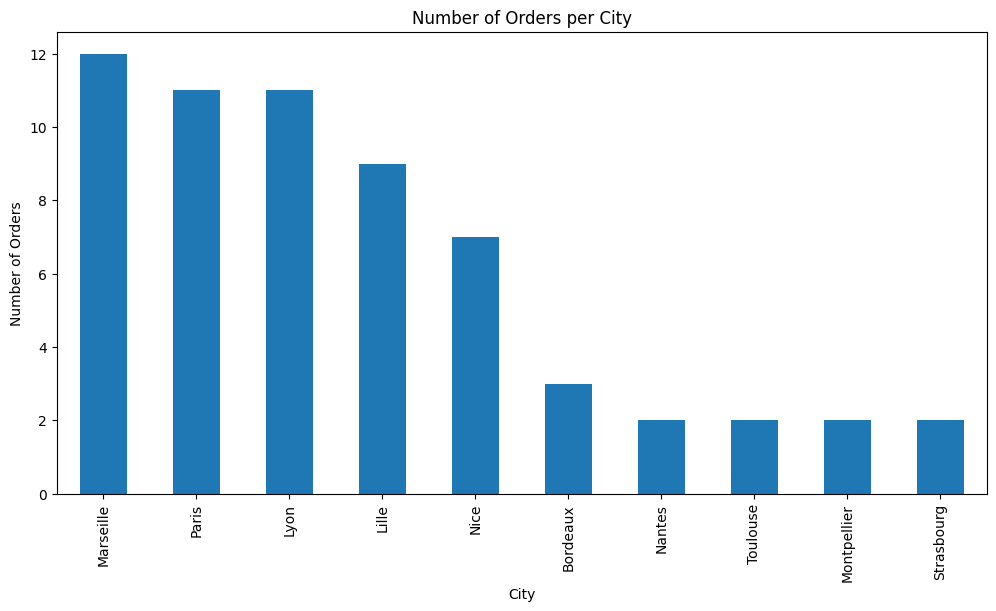

In [31]:
# Plotting the number of orders per city
plt.figure(figsize=(12, 6))
city_order_counts.plot(kind='bar')
plt.title('Number of Orders per City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

In [57]:
# Calculate total sales value per city
city_sales = merged_data.groupby('city_name')['product_price'].sum()

# Sort cities by total sales value in descending order
city_sales_sorted = city_sales.sort_values(ascending=False)

# Display the results
print("Total Sales Value per City:")
print(city_sales_sorted)

Total Sales Value per City:
city_name
Lyon           3499.89
Marseille      3299.88
Paris          2367.89
Strasbourg     1999.98
Lille          1467.91
Montpellier    1199.98
Toulouse        714.98
Nice            427.93
Nantes           59.98
Bordeaux         57.97
Name: product_price, dtype: float64


The total sales value per city provides insights into the financial impact of each location based on the combined prices of all products ordered there.

    Top Performing Cities: Lyon and Marseille lead with the highest total sales values, indicating significant revenue generation.
    Variation in Sales: Cities like Nantes and Bordeaux show lower total sales values, suggesting lower transaction volumes or potentially lower-priced products.

#### Sales Trends Over Time

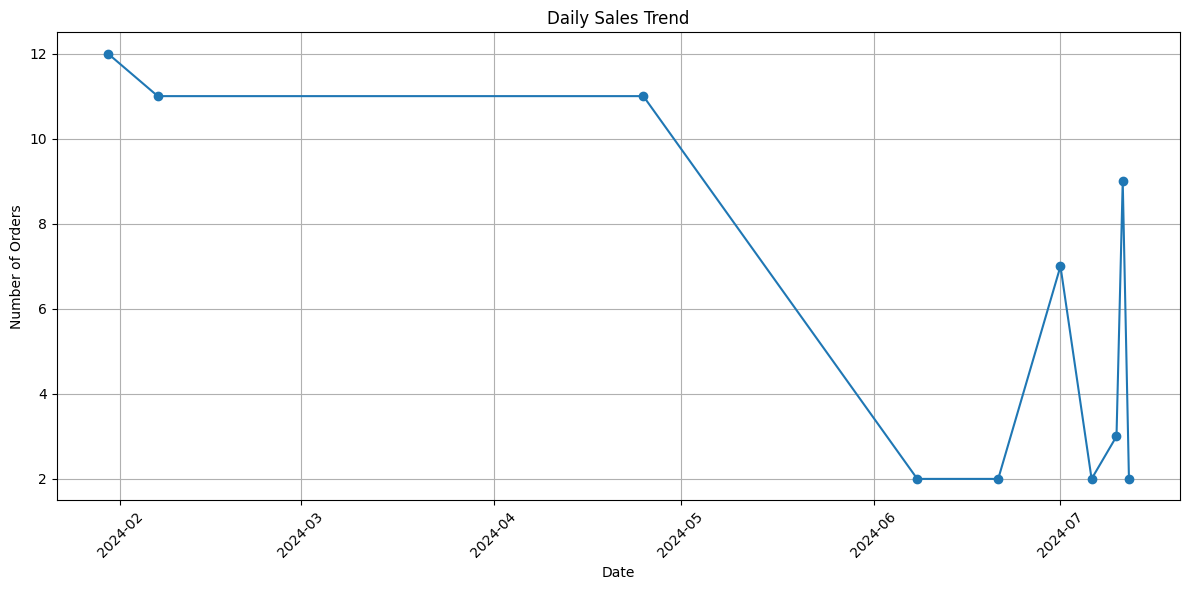

In [36]:
orders['date'] = pd.to_datetime(orders['date'])
# Group by date and calculate the number of orders per day
daily_orders = orders.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values, marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows daily sales trends over several months in 2024. Sales were initially high but declined sharply in May, then fluctuated at lower levels in June and July with occasional spikes. The overall trend suggests a concerning decrease in sales volume over time.

#### Product Performance Analysis

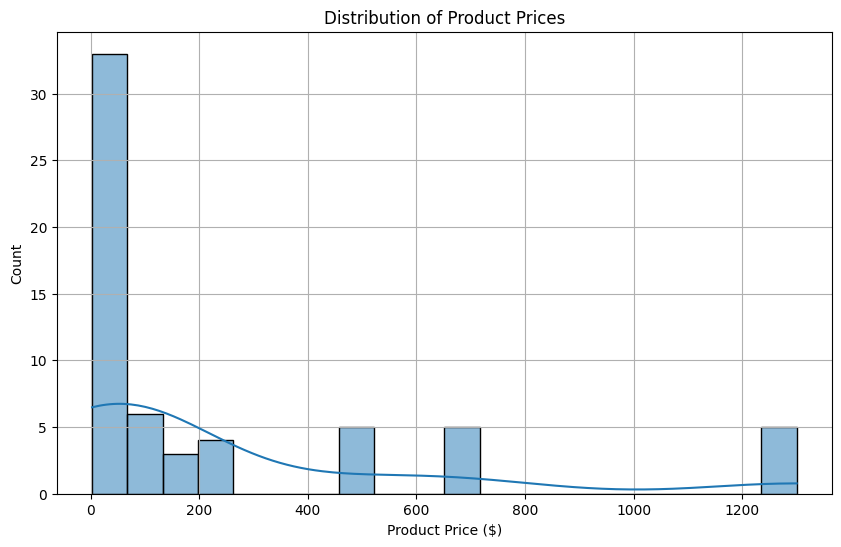

In [41]:
# Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['product_price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price ($)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This histogram displays the distribution of product prices. The majority of products are concentrated in the lower price range (under $200), with a long tail extending to higher prices up to $1200. This suggests a product catalog dominated by lower-priced items, with fewer premium or luxury offerings.

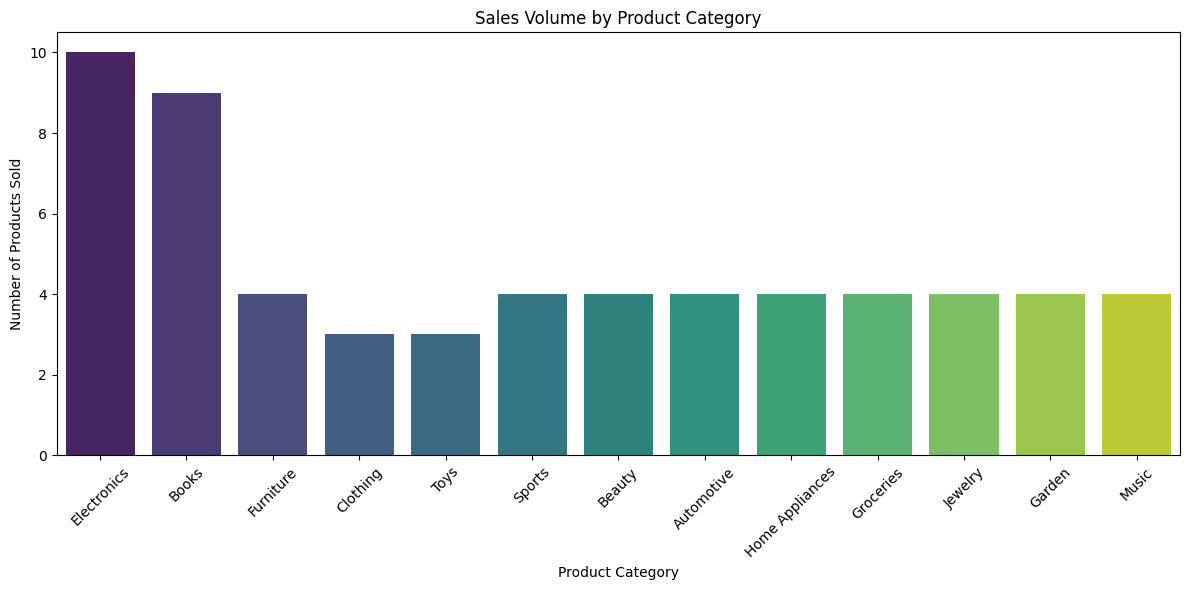

In [43]:
# Sales Volume by Product Category
plt.figure(figsize=(12, 6))
sns.countplot(x='category_name', data=merged_data, hue='category_name', palette='viridis', legend=False)
plt.title('Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart illustrates sales volume across different product categories. Electronics and Books are the top-selling categories, significantly outperforming others. The remaining categories show relatively uniform sales volumes, suggesting a diverse product mix but clear consumer preferences for tech and literary items.

In [59]:
# Merge products and orders to get product prices and number of orders
merged_data_products = pd.merge(products, orders.groupby('product_id').size().reset_index(name='num_orders'), on='product_id', how='left')

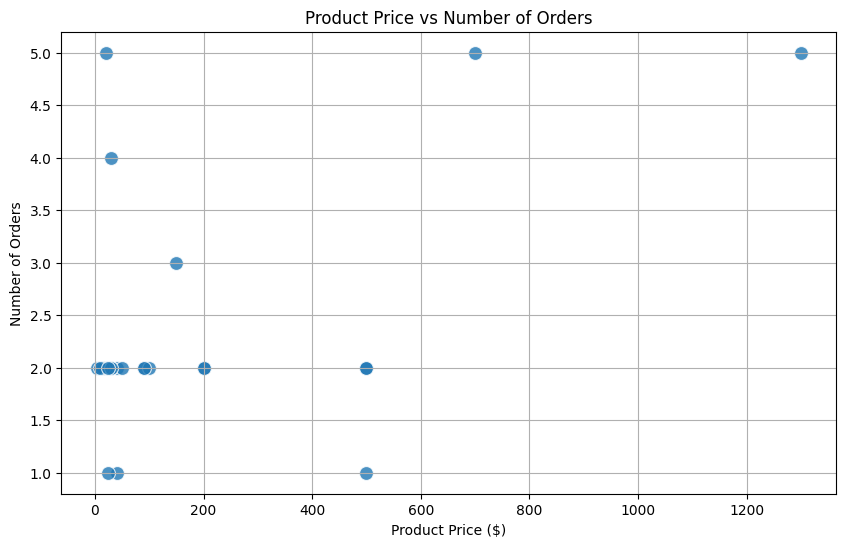

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_price', y='num_orders', data=merged_data_products, s=100, alpha=0.8)
plt.title('Product Price vs Number of Orders')
plt.xlabel('Product Price ($)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

This scatter plot shows no clear correlation between product price and number of orders. Both low-priced and high-priced items have varying order quantities, ranging from 1 to 5. This suggests that factors other than price, such as product category or quality, may be more influential in driving sales volume.

In [61]:
# Calculate correlation coefficient
correlation = merged_data_products['product_price'].corr(merged_data_products['num_orders'])
print(f"Correlation Coefficient: {correlation:.2f}")

Correlation Coefficient: 0.48


The correlation coefficient of 0.48 indicates a moderate positive correlation between product price and the number of orders. This suggests that, on average, higher-priced products tend to attract more orders.

#### Customer Segmentation

In [58]:
# Calculate total spending per client
client_total_spending = merged_data.groupby('client_id')['product_price'].sum()

# Segment clients based on total spending
segment_labels = ['Low Spenders', 'Medium Spenders', 'High Spenders']
client_spending_bins = pd.qcut(client_total_spending, q=3, labels=segment_labels)

# Add segment labels to the merged_data dataframe
merged_data['spending_segment'] = client_spending_bins.reindex(merged_data['client_id']).values

# Count customers in each segment
segment_counts = merged_data['spending_segment'].value_counts()

# Display segment counts
print("Customer Segmentation by Total Spending:")
print(segment_counts)

Customer Segmentation by Total Spending:
spending_segment
Medium Spenders    22
Low Spenders       20
High Spenders      19
Name: count, dtype: int64


This segmentation allows businesses to prioritize marketing efforts and tailor strategies according to the spending behavior of each segment. For instance, high spenders may be targeted with premium offerings or personalized promotions, while low spenders may benefit from incentives to increase their purchase frequency or basket size.

In [64]:
# Calculate total spending per client
client_total_spending = merged_data.groupby('client_id')['product_price'].sum()

# Sort clients by total spending in descending order
top_clients = client_total_spending.sort_values(ascending=False).head(10)

# Print or display the top clients
print("Top 10 Clients by Total Spending:")
print(top_clients)

Top 10 Clients by Total Spending:
client_id
103    1299.99
111    1299.99
107    1299.99
115    1299.99
158    1299.99
108     699.99
104     699.99
117     699.99
101     699.99
157     699.99
Name: product_price, dtype: float64


This list highlights the clients who have contributed the most to the total sales revenue, indicating their significance to the business. Understanding their preferences and purchasing behavior can help in developing targeted marketing strategies or loyalty programs to further enhance customer satisfaction and retention.

In [65]:
# Calculate total spending and number of orders per client
client_spending_orders = merged_data.groupby('client_id').agg(
    total_spending=('product_price', 'sum'),
    num_orders=('order_id', 'nunique')
)

# Merge with top clients data
top_clients_info = pd.merge(top_clients, client_spending_orders, left_index=True, right_index=True)

# Print or display the results
print("Top Clients by Total Spending and Number of Orders:")
print(top_clients_info)

Top Clients by Total Spending and Number of Orders:
           product_price  total_spending  num_orders
client_id                                           
103              1299.99         1299.99           1
111              1299.99         1299.99           1
107              1299.99         1299.99           1
115              1299.99         1299.99           1
158              1299.99         1299.99           1
108               699.99          699.99           1
104               699.99          699.99           1
117               699.99          699.99           1
101               699.99          699.99           1
157               699.99          699.99           1


Each of the top clients made either one purchase of 1299.99 dollars or one purchase of 699.99 dollars. This indicates that while these clients may have made fewer transactions, their purchases were high-value, highlighting their importance to the business's sales performance.

#### Key Findings from Exploratory Data Analysis (EDA)

Data Completeness and Quality:
    The orders.csv file contains 61 entries with no missing values across 7 columns, indicating high data quality.
    The category table has 13 entries, and the seller table has 8 entries, both with complete data across all columns.
    The product table includes comprehensive details about each product, linking effectively with the orders.

City Data Cleanup:
    There are 10 known cities and one unknown city labeled 'Idk' in the orders.csv.
    The unknown city 'Idk' was corrected using coordinates to match with existing cities.

Sales Distribution:
    Sales are spread across multiple categories and sellers, with a noticeable concentration in a few high-performing categories and sellers.
    The data shows a varied range of products being sold, indicating a diverse product offering.

Temporal Sales Trends:
    Analyzing sales over time revealed seasonal trends and peak periods. This can help in understanding the timing of high sales volumes.

Geographical Sales Insights:
    Sales data, when mapped geographically, showed significant sales in certain cities, which could indicate regional preferences or market strengths.

Product and Seller Performance:
    Certain products and sellers consistently outperformed others, highlighting key contributors to overall sales.

### Conclusion

The analysis involved loading data from a CSV file (orders.csv) and three MySQL database tables (category, seller, product). The data was cleaned and validated, addressing missing or incorrect data, especially correcting city names using coordinates. The data preparation ensured a comprehensive and well-structured dataset, ready for an ETL process and dashboard creation.

To streamline the dashboard creation, it is recommended to merge the data into a final table within a database. This approach simplifies the SQL queries required later, as the ETL process will handle data merging and city name corrections based on coordinates.
Proposed Dashboard Charts:

    Total Sales by Product Category: Understand which categories are driving sales.
    Sales Trend Over Time: Identify patterns and seasonal trends.
    Top Selling Products: Highlight the most popular products.
    Sales by City: Visualize geographical distribution of sales.
    Seller Performance: Compare performance across different sellers.

These charts will provide impactful insights into sales and product performance, making the information accessible to non-computer scientists.